## Code for lab 5, image classification using some image analysis techniques


### Exploratory analysis

In [17]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
mnist = loadmat("mnist_data.mat")

In [6]:
print(mnist.keys())
for key, val in mnist.items():
    print(key, val)

dict_keys(['__header__', '__version__', '__globals__', 'x', 'z'])
__header__ b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri May  4 15:51:23 2018'
__version__ 1.0
__globals__ []
x [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. .

In [14]:
images = mnist["x"]
labels = mnist["z"].flatten()
print(images.shape)
print(labels.shape)

(28, 28, 1000)
(1000,)


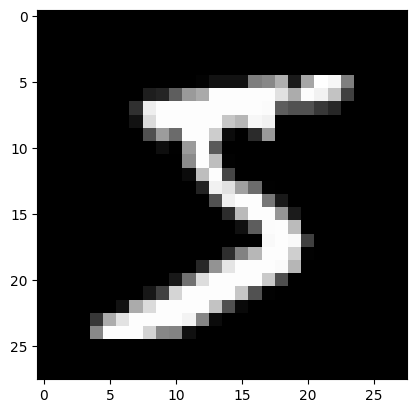

[5]
Max pixel value:  1.0
Min pixel value:  0.0


In [13]:
plt.imshow(images[:, :, 0], cmap="gray")
plt.show()
print(labels[0])

print("Max pixel value: ", images.max())
print("Min pixel value: ", images.min())
# Is between 0 and 1, so no need to normalize

## No image analysis just all the raw features

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

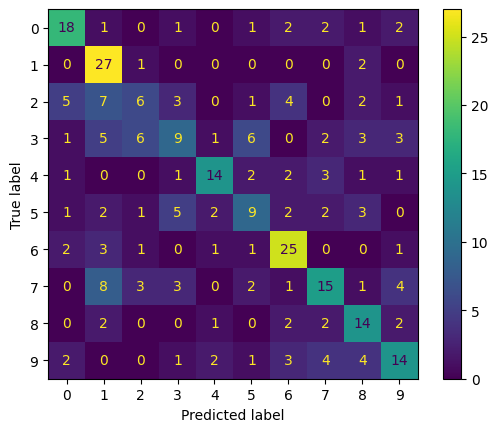

Test accuracy:  0.5033333333333333


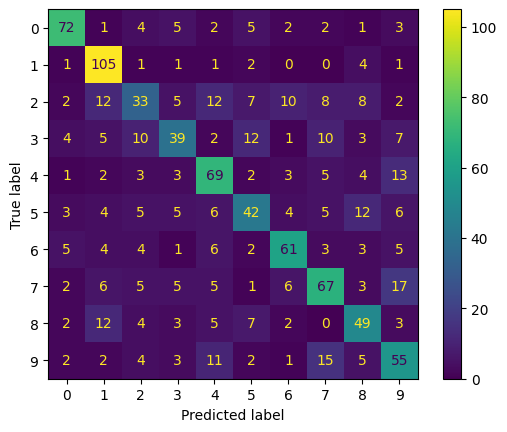

Cross validation accuracy:  0.592


In [97]:
im_x = images.reshape(784, 1000).T
im_x_train, im_x_test, labels_train, labels_test = train_test_split(im_x, labels, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(im_x_train, labels_train)
predictions = lda.predict(im_x_test)
cm = confusion_matrix(labels_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Test accuracy: ", np.sum(predictions == labels_test) / len(labels_test))

predictions = cross_val_predict(lda, im_x, labels, cv=5)
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Cross validation accuracy: ", np.sum(predictions == labels) / len(labels))

## Normal moment features

In [80]:
from moment_features import generate_moments

mf = []
for i in range(images.shape[2]):
    mf.append(generate_moments(images[:, :, i], None, 10, 10))

mf = np.vstack(mf)
print(mf.shape)

(1000, 100)


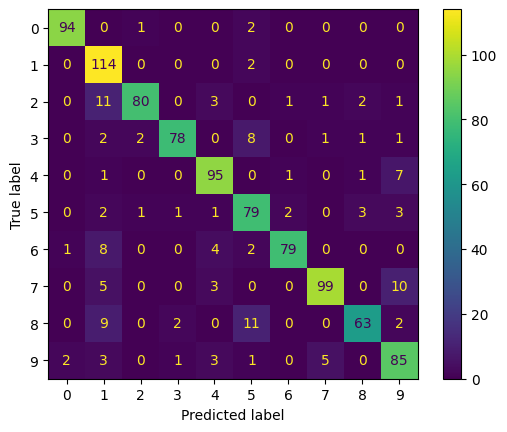

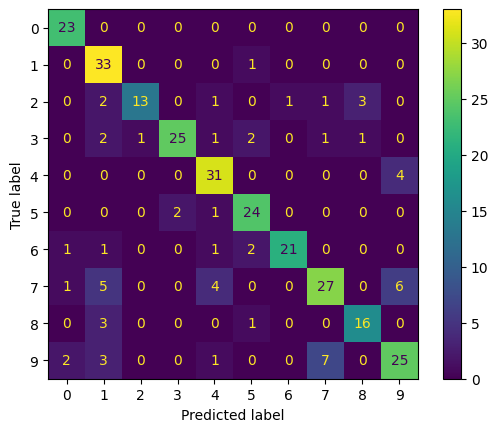

Test accuracy:  0.7933333333333333


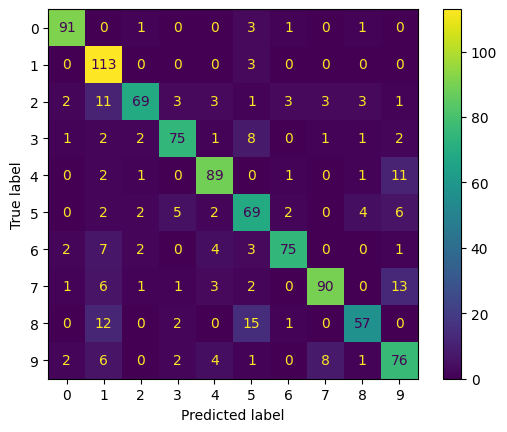

Test accuracy:  0.804


In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

mf_train, mf_test, labels_train, labels_test = train_test_split(mf, labels, test_size=0.3) #, random_state=42

lda = LinearDiscriminantAnalysis()
lda.fit(mf, labels)
# Resubsitution error is from the predictions on the training set
mf_predictions = lda.predict(mf)

# plot confusion matrix
cm = confusion_matrix(labels, mf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()

# Train and test set run
lda.fit(mf_train, labels_train)
mf_predictions = lda.predict(mf_test)

# plot confusion matrix
cm = confusion_matrix(labels_test, mf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Test accuracy: ", np.sum(mf_predictions == labels_test) / len(labels_test))

cv_predictions = cross_val_predict(lda, mf, labels, cv=5)
cm = confusion_matrix(labels, cv_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()
print("Test accuracy: ", np.sum(cv_predictions == labels) / len(labels))